<h1 style='font-family:verdana; color:darkblue;text-align:center;'>Medical Data Visualizer</h1>
<p style='font-family:courier;color:red;text-align:center;font-size:20px'>Data Analysis with Python</p>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('medical_examination.csv')
df.head(3)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [3]:
df.shape

(70000, 13)

In [4]:
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [7]:
df.dtypes

id               int64
age              int64
sex              int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

<h1 style='font-family:courier;color:blue;text-align:center; background-color:lightblue'>Task: 1</h1>

### Calculate BMI

- BMI Formula: weight (kg) / [height (m)]2

In [98]:
# Method (1) `np.square(df['height'] / 100)`
# bmi = df['weight'] / np.square(df['height']/100)

# Method (2): 
h = (df['height'] / 100)**2
w = df['weight']
bmi = w / h
bmi

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Length: 70000, dtype: float64

### Add `overweight` column & replace value `0 and 1`

In [106]:
df['overweight'] = (bmi > 25).astype('uint8')
df['overweight']

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: uint8

In [108]:
df.head(3)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0


<h1 style='font-family:courier;color:blue;text-align:center; background-color:lightblue'>Task: 2</h1>

### Normalize the data making the value of `'colesterol' or 'gluc'`

In [120]:
(df['cholesterol'] | df['gluc'] != 1).astype('uint8')

0        0
1        1
2        1
3        0
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    1
Length: 70000, dtype: uint8

<h1 style='font-family:courier;color:blue;text-align:center; background-color:lightblue'>Task: 3</h1>

In [121]:
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'],
      dtype='object')

In [128]:
columns = [
      'active',
      'alco',
      'cholesterol',
      'gluc',
      'overweight',
      'smoke'
    ]

In [130]:
df_cate = pd.melt(df, id_vars=["cardio"], value_vars=columns)
df_cate

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [157]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
# You will have to rename one of the collumns for the catplot to work correctly.

df_cate = df_cate.reset_index() \
                .groupby(['variable', 'cardio', 'value']) \
                .agg('count') \
                .rename(columns={'index': 'total'}) \
                .reset_index()


In [158]:
# df_cate.reset_index()
# df_cate.groupby(['variable','cardio','value'])
# df_cate.agg('count')
# df_cate.rename(columns={'index':'total'})
# df_cate.reset_index()

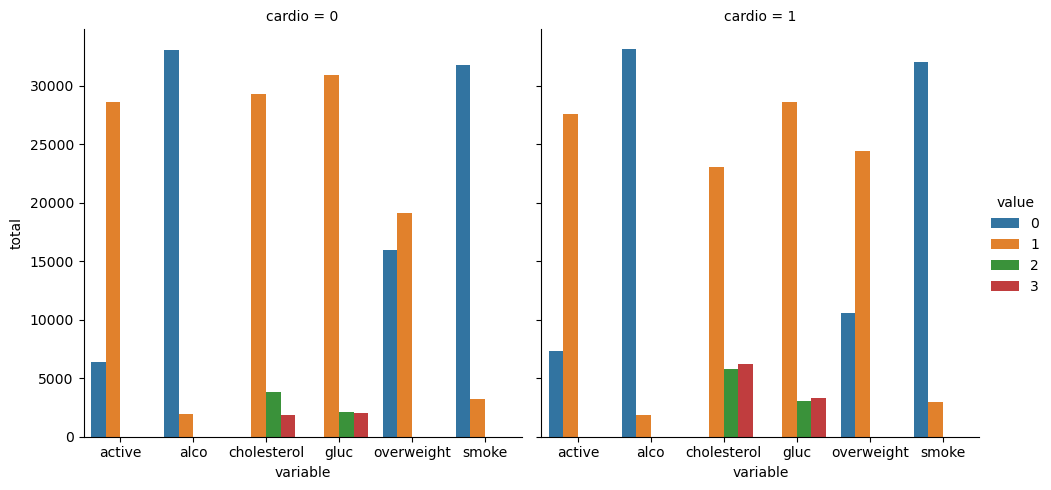

In [184]:
fig = sns.catplot(x='variable', y='total', data =df_cate,
                  kind='bar',
                  col='cardio',
                  hue='value').fig

In [187]:
# Save fig
fig.savefig('catplot.png')

<h1 style='font-family:courier;color:blue;text-align:center; background-color:lightblue'>Task: 4</h1>

- Clean the data. Filter out the following patient segments that represent incorrect data:

    - diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    
    - height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    - height is more than the 97.5th percentile
    - weight is less than the 2.5th percentile
    - weight is more than the 97.5th percentile

In [189]:
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'],
      dtype='object')

### Clean Data

- **diastolic pressure is higher than systolic**

In [197]:
# (df['ap_lo'] <= df['ap_hi'])

- **height is less than 2.5 percentile** `df['height'].quantile(0.025)`

In [198]:
# (df['height'] >= df['height'].quantile(0.025))

- **height is more than 97.5th percentile**

In [206]:
#(df['height'] >= df['height'].quantile(0.975))

- **height is more than 2.5th percentile**

In [207]:
#(df['height'] >= df['height'].quantile(0.025))

- **weight is more than 2.5th percentile**

In [211]:
# (df['weight'] >= df['weight'].quantile(0.025))

- **weight is more than 97.5th percentile**

In [213]:
# (df['weight'] >= df['weight'].quantile(0.975))

In [214]:
df_heat = df[
      (df['ap_lo'] <= df['ap_hi'])
      & (df['height'] >= df['height'].quantile(0.025))
      & (df['height'] <= df['height'].quantile(0.975))
      & (df['weight'] >= df['weight'].quantile(0.025))
      & (df['weight'] <= df['weight'].quantile(0.975))
    ]

In [216]:
df_heat.head(3)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0


In [235]:
corr = df_heat.corr(method='pearson')
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.005581,0.002242,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.154642,0.097646,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.038756,-0.023419,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.065980,-0.028364,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.137705,0.094133,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.021499,0.010226,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.154348,0.067048,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.005581,0.154642,-0.038756,-0.065980,0.137705,0.021499,0.154348,1.000000,0.451388,0.005696,0.031050,0.007381,0.219090,0.124846
gluc,0.002242,0.097646,-0.023419,-0.028364,0.094133,0.010226,0.067048,0.451388,1.000000,-0.010225,0.005805,-0.007709,0.087621,0.076303
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.005696,-0.010225,1.000000,0.341200,0.026940,-0.020345,-0.003274


<AxesSubplot:>

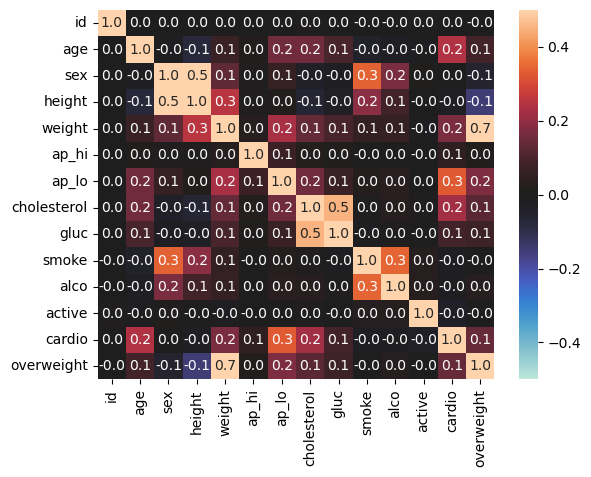

In [236]:
# Draft
sns.heatmap(corr,
           annot=True, fmt='.1f',
            center=0, vmin=-0.5, vmax=0.5)

### Mask the upper triangle

In [228]:
 # Generate a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

In [229]:
fig = plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<AxesSubplot:>

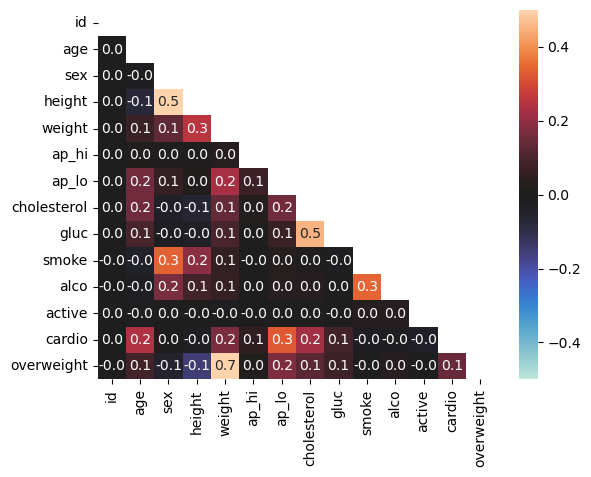

In [230]:
sns.heatmap(corr, mask=mask,
                annot=True, fmt='.1f',
                center=0, vmin=-0.5, vmax=0.5)

### Save Figure

In [237]:
fig.savefig('heatmap.png')